In [1]:
#importing libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import os

### Gathering Data

#### 1.Twitter_archirve file

In [2]:
twitter_archrive = pd.read_csv('C:/Users/chinshu/Documents/twitter-archive-enhanced (1).csv')
twitter_archrive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [3]:
twitter_archrive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Here one sample tweet is shown from the data

In [4]:
sample_tweet = twitter_archrive.iloc[2]
sample_tweet

tweet_id                                                     891815181378084864
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-31 00:18:03 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Archie. He is a rare Norwegian Pouncin...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/891815181...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

In [5]:
sample_tweet.text

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'

In [6]:
sample_tweet.expanded_urls

'https://twitter.com/dog_rates/status/891815181378084864/photo/1'

In [7]:
sample_tweet.source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

### 2.Image prediction file

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet. This file (image_predictions.tsv) is hosted on Udacity's servers and downloaded using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [8]:
# downloading the image-prediction-file using the url from udacity servers.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

<b>the above output response [200] sates that response has sucessfully excutted

In [9]:
file_images = url.split('/')[-1]

with open(os.path.join('./', file_images),mode='wb') as file:
    file.write(response.content)

In [10]:
prediction_file = pd.read_csv(file_images, sep='\\t',engine='python')
prediction_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
prediction_file.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


sample of the image prediction file

In [12]:
prediction_file.iloc[2]

tweet_id                                 666033412701032449
jpg_url     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
img_num                                                   1
p1                                          German_shepherd
p1_conf                                            0.596461
p1_dog                                                 True
p2                                                 malinois
p2_conf                                            0.138584
p2_dog                                                 True
p3                                               bloodhound
p3_conf                                            0.116197
p3_dog                                                 True
Name: 2, dtype: object

### 3.Download tweet Jason data

Query the Twitter API using Python's Tweepy library to get the entire set of JSON data for each of the tweets in the WeRateDogs Twitter archive. Each tweet's JSON data is written to its own line in a file called tweet_json.txt file.

In [13]:
#downloading the Data using twitter API

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth, 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [14]:
# list of tweet ids from enhanced data set
tweet_ids = twitter_archrive['tweet_id']

# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# For loop which will add each available tweet json to df_list
for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        # storing it into a data frame df_tweets
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Rate limit reached. Sleeping for: 491


754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 524


In [15]:
# creating DataFrames
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# saving the dataFrame to file
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [16]:

# Read the saved tweet_json.txt file into a dataframe
df_api_data = pd.read_csv('C:/Users/chinshu/Documents/tweet_json.txt', encoding = 'utf-8')

In [17]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   int64 
 1   favorites        2331 non-null   int64 
 2   retweets         2331 non-null   int64 
 3   user_followers   2331 non-null   int64 
 4   user_favourites  2331 non-null   int64 
 5   date_time        2331 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.4+ KB


## Assessing Data

After gathering all the 3 files, stored their data into a dataframe for easier assessment and cleaning. In order to assess the data, I examined it visually and programatically using python's pandas library. First, I printed out all the dataframes entirely, used the info() function to assess the datatypes, used describe() function to summarise the quantitative variables in the datasets, etc. Then i examined the dataframes more specifically by examining each variable separately and found out the following issues

In [18]:
twitter_archrive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1092,737322739594330112,NaN,NaN,2016-05-30 16:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's not injured or anythi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737322739...,9,10,Lily,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9,10,a,None,None,None,None
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,None,None,None
451,818627210458333184,NaN,NaN,2017-01-10 01:15:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wafer. He represents every fiber of my be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818627210...,13,10,Wafer,None,None,None,None
1514,691090071332753408,NaN,NaN,2016-01-24 02:48:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's a dog in a mailbox. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691090071...,12,10,None,None,None,None,None
2221,668480044826800133,NaN,NaN,2015-11-22 17:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to DayZ. She is definitely stuck on ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668480044...,11,10,DayZ,None,None,None,None
1952,673680198160809984,NaN,NaN,2015-12-07 01:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shnuggles. I would kill for Shnuggles....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673680198...,13,10,Shnuggles,None,None,None,None
2277,667437278097252352,NaN,NaN,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667437278...,10,10,None,None,None,None,None
690,787397959788929025,NaN,NaN,2016-10-15 21:01:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's rather h*ckin dangerous (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787397959...,11,10,Moose,None,None,None,None
2109,670449342516494336,NaN,NaN,2015-11-28 03:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Vibrant dog here. Fabulous tail. Only 2 legs t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670449342...,5,10,None,None,None,None,None


In [19]:
twitter_archrive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
twitter_archrive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
twitter_archrive.name.isnull().sum()

0

In [22]:
twitter_archrive.loc[np.random.randint(0,twitter_archrive.shape[0],[30]),['text','name']]

,text,name
1296,Meet Rufus. He's a Honeysuckle Firefox. Curly ...,Rufus
2097,This is Jerry. He's a great listener. Low main...,Jerry
128,Meet Harold. He's h*ckin cooperative. 13/10 g...,Harold
1659,aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,None
751,Everybody drop what you're doing and look at t...,None
901,This is Brandonald. He accidentally opened the...,Brandonald
1775,This is Reese. He likes holding hands. 12/10 h...,Reese
255,This is Margo. She just dug pup a massive hole...,Margo
1778,Guys this was terrifying. Really spooked me up...,None
1026,This is Gustav. He has claimed that plant. It ...,Gustav


In [23]:
twitter_archrive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Amy          1
Adele        1
Bertson      1
Lorelei      1
Kona         1
Name: name, Length: 957, dtype: int64

In [24]:
twitter_archrive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [25]:
prediction_file.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
prediction_file.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
prediction_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   int64 
 1   favorites        2331 non-null   int64 
 2   retweets         2331 non-null   int64 
 3   user_followers   2331 non-null   int64 
 4   user_favourites  2331 non-null   int64 
 5   date_time        2331 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.4+ KB


In [29]:
df_api_data.drop(['user_favourites','date_time'], axis=1, inplace=True)
df_api_data.head()

,tweet_id,favorites,retweets,user_followers
0,892420643555336193,36281,7723,8777249
1,892177421306343426,31289,5712,8777249
2,891815181378084864,23558,3786,8777249
3,891689557279858688,39569,7880,8777249
4,891327558926688256,37799,8498,8777249


In [30]:
df_api_data.sample(10)

,tweet_id,favorites,retweets,user_followers
757,776113305656188928,11959,4422,8777262
1089,733109485275860992,50073,16814,8777291
1944,673317986296586240,851,244,8777338
115,869702957897576449,26839,5869,8777250
325,832273440279240704,11427,2355,8777257
618,793500921481273345,10918,2436,8777258
2174,668779399630725120,681,353,8777341
1034,741793263812808706,4540,1511,8777290
2105,670093938074779648,993,317,8778026
1673,681231109724700672,2409,483,8777301


In [31]:
df_api_data.describe()

,tweet_id,favorites,retweets,user_followers
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03
mean,7.419079e+17,7577.202488,2710.178464,8.777298e+06
std,6.823170e+16,11760.144715,4583.596935,7.739532e+01
min,6.660209e+17,0.000000,1.000000,8.777248e+06
25%,6.782670e+17,1320.500000,548.500000,8.777258e+06
50%,7.182469e+17,3298.000000,1272.000000,8.777292e+06
75%,7.986692e+17,9280.500000,3148.500000,8.777303e+06
max,8.924206e+17,156567.000000,78009.000000,8.778027e+06


## Quality

missing and incorrected dog names and the most popular dogname is 'a' which is not a name given by owner.
<br>TimeStamp is in string format.
<br>source not extracted from hyper link tag.
<br>Columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id and retweeted_status_timestamp, have a lot of null values.
<br>Gender of dog could be extracted from text.
## Tidiness
The dog stage columns in twitter_archive can be arranged into a single column.
<br>The image predictions could be condensed to show just the most confident dog breed prediction.
<br>All three dataframes can be combined into one single dataframe.

## clean

Cleaning process consists of three steps: Define, code & Test. First we define how to tackle the issue. Then, we code to resolve the issue and finally we test our code to see if the issues with the data have been resolved. So, in order to clean these 3 dataframes, I carried out the 3 steps for each of the issues and was finally able to achive a clean dataframe.

In [32]:
#Create a copy of all the gathered dataframes
df_twitter_archive_copy = twitter_archrive.copy()
df_img_predictions_copy = prediction_file.copy()
df_tweet_data_copy = df_api_data.copy()

<b> missing and incorrect dog names extracted from text

In [33]:
import re
def extract_name(row):
    try:
        if 'This is' in row['text']:
            name = re.search('This is ([A-Z]\w+)',row['text']).group(1)
        elif 'Meet' in row.text:
            name = re.search('Meet ([A-Z]\w+)',row['text']).group(1)
        elif 'Say hello to' in row.text:
            name = re.search('Say hello to ([A-Z]\w+)',row['text']).group(1)
        elif 'named' in row.text:
            name = re.search('named ([A-Z]\w+)',row['text']).group(1)
        else:
            name = ''
    except AttributeError:
        name = ''
    return name   
        

In [34]:
df_twitter_archive_copy['name'] = df_twitter_archive_copy.apply(extract_name, axis=1)

In [35]:
df_twitter_archive_copy.name.value_counts()

            856
Charlie      12
Oliver       11
Lucy         11
Cooper       11
           ... 
Jordy         1
Todo          1
Ralphson      1
Pluto         1
Tove          1
Name: name, Length: 931, dtype: int64

<b> Source not extracted properly from hyperlink tag

In [36]:
def extract_source(row):
    try:
        source = re.search('>(.+)</a>', row['source']).group(1)
    except AttributeError:
        source = ''
    return source

In [37]:
df_twitter_archive_copy['source'] = df_twitter_archive_copy.apply(extract_source, axis=1)
df_twitter_archive_copy['source'] = df_twitter_archive_copy.source.astype('category')

In [38]:
df_twitter_archive_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [39]:
def extract_gender(row):
    if 'He' in row['text']:
        gender = 'M'
    elif 'She' in row['text']:
        gender = 'F'
    else:
        gender = ''
    return gender

In [40]:
df_twitter_archive_copy['gender'] = df_twitter_archive_copy.apply(extract_gender, axis=1)
df_twitter_archive_copy['gender'] = df_twitter_archive_copy.gender.astype('category')

In [41]:
df_twitter_archive_copy.gender.value_counts()

M    1144
      893
F     319
Name: gender, dtype: int64

In [42]:
df_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   category
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  doggo             

### Tidiness

The dog stage columns in twitter_archive can be arranged into a single column.

In [43]:
def get_dog_stage(row):
    if 'doggo' in row['text'].lower():
        stage = 'doggo'
    elif 'floof' in row['text'].lower():
        stage = 'floofer'
    elif 'pupper' in row['text'].lower():
        stage = 'pupper'
    elif 'puppo' in row['text'].lower():
        stage = 'puppo'
    else:
        stage = ''
    return stage

In [44]:
df_twitter_archive_copy['stage'] = df_twitter_archive_copy.apply(get_dog_stage, axis=1)
df_twitter_archive_copy['stage'] = df_twitter_archive_copy.stage.astype('category')

In [45]:
df_twitter_archive_copy.drop(['doggo','pupper','floofer','puppo'], axis=1, inplace=True)


In [46]:
df_twitter_archive_copy.stage.value_counts()

           1905
pupper      270
doggo       107
floofer      38
puppo        36
Name: stage, dtype: int64

In [47]:
list(df_twitter_archive_copy)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'gender',
 'stage']

<b> The image predictions could be condensed to show just the most confident dog breed prediction
    
    Instead of showing 3 predictions, show the top dog breed prediction. Only consider that prediction for which the dog prediction is true. Also, remove the unwanted columns.

In [48]:
breed = []
confidence = []

def get_breed_and_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Not identified')
        confidence.append(np.nan)
        

In [49]:
        
df_img_predictions_copy.apply(get_breed_and_confidence, axis=1)
df_img_predictions_copy['breed'] = pd.Series(breed)
df_img_predictions_copy['confidence'] = pd.Series(confidence)
df_img_predictions_copy.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [50]:
df_img_predictions_copy.head()

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [51]:
df_img_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   breed       2075 non-null   object 
 4   confidence  1751 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


<b> All three dataframes can be combined into one single dataframe

In [52]:
df = pd.merge(df_twitter_archive_copy, df_img_predictions_copy, on='tweet_id')
df = df.merge(df_tweet_data_copy, on='tweet_id')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2059 non-null   int64   
 1   in_reply_to_status_id       23 non-null     float64 
 2   in_reply_to_user_id         23 non-null     float64 
 3   timestamp                   2059 non-null   object  
 4   source                      2059 non-null   category
 5   text                        2059 non-null   object  
 6   retweeted_status_id         72 non-null     float64 
 7   retweeted_status_user_id    72 non-null     float64 
 8   retweeted_status_timestamp  72 non-null     object  
 9   expanded_urls               2059 non-null   object  
 10  rating_numerator            2059 non-null   int64   
 11  rating_denominator          2059 non-null   int64   
 12  name                        2059 non-null   object  
 13  gender            

In [54]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,gender,stage,jpg_url,img_num,breed,confidence,favorites,retweets,user_followers
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,Phineas,M,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not identified,NaN,36281,7723,8777249
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,F,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,31289,5712,8777249
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Archie,M,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,23558,3786,8777249
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Darla,F,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,39569,7880,8777249
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Franklin,M,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,37799,8498,8777249


<b> removing the unwanted columns

In [55]:
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id',
         'retweeted_status_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [56]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,gender,stage,jpg_url,img_num,breed,confidence,favorites,retweets,user_followers
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,M,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not identified,NaN,36281,7723,8777249
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,F,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,31289,5712,8777249
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,M,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,23558,3786,8777249
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,F,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,39569,7880,8777249
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,M,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,37799,8498,8777249


In [57]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'gender', 'stage',
       'jpg_url', 'img_num', 'breed', 'confidence', 'favorites', 'retweets',
       'user_followers'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2059 non-null   int64   
 1   timestamp           2059 non-null   object  
 2   source              2059 non-null   category
 3   text                2059 non-null   object  
 4   expanded_urls       2059 non-null   object  
 5   rating_numerator    2059 non-null   int64   
 6   rating_denominator  2059 non-null   int64   
 7   name                2059 non-null   object  
 8   gender              2059 non-null   category
 9   stage               2059 non-null   category
 10  jpg_url             2059 non-null   object  
 11  img_num             2059 non-null   int64   
 12  breed               2059 non-null   object  
 13  confidence          1737 non-null   float64 
 14  favorites           2059 non-null   int64   
 15  retweets            2059 non-null   in

<b> Incorrect data types.
    
tweet_id which is in int64 format should be in string format as we don't need to perform any mathematic operations on tweet_id. The timestamp should be an datetime object instead of string.

In [59]:
df.tweet_id = df.tweet_id.to_string()
df.timestamp = pd.to_datetime(df.timestamp, yearfirst=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2059 non-null   object             
 1   timestamp           2059 non-null   datetime64[ns, UTC]
 2   source              2059 non-null   category           
 3   text                2059 non-null   object             
 4   expanded_urls       2059 non-null   object             
 5   rating_numerator    2059 non-null   int64              
 6   rating_denominator  2059 non-null   int64              
 7   name                2059 non-null   object             
 8   gender              2059 non-null   category           
 9   stage               2059 non-null   category           
 10  jpg_url             2059 non-null   object             
 11  img_num             2059 non-null   int64              
 12  breed               2059 non-null 

In [61]:
df[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2059.000000,2059.000000
mean,12.263720,10.515299
std,40.838002,7.204775
min,0.000000,2.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


The ratings seem to be unresonable as the numerator is greater than the denominator and also the numerator varies over a long range.Creating a new variable called rating which stores the ratio of the numerator and denominator and accordingly divide the dogs into different categories using the ratio value. Also, removing the rating_numerator and rating_denominator colums.

In [62]:
df['rating'] = df.rating_numerator/df.rating_denominator

#Use ratings to divide into categories
df['rating_category'] = pd.cut(df.rating, bins = [0.0, np.percentile(df.rating,25), np.percentile(df.rating,50), np.percentile(df.rating,75), np.max(df.rating)],labels=['Low','Below_average','Above_average','High'])

#Drop the unwanted columns
df.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

In [63]:
df.rating_category.value_counts()

Low              843
Above_average    475
Below_average    419
High             320
Name: rating_category, dtype: int64

A lot of columns still have value as '' or 0.0. These should be coverted to NaN in case of a quantitative variable(rating) and None in case of a qualitative variable(name, gender, stage, breed, rating_category). Also rating as 0 should be NaN.

In [64]:
df.loc[df['name'] == '', 'name'] = None
df.loc[df['gender'] == '', 'gender'] = None
df.loc[df['stage'] == '', 'stage'] = None
df.loc[df['breed'] == '', 'breed'] = None
df.loc[df['rating'] == 0.0, 'rating'] = np.nan
df.loc[df['rating'] == 0.0, 'rating_category'] = None

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         2059 non-null   object             
 1   timestamp        2059 non-null   datetime64[ns, UTC]
 2   source           2059 non-null   category           
 3   text             2059 non-null   object             
 4   expanded_urls    2059 non-null   object             
 5   name             1384 non-null   object             
 6   gender           1349 non-null   category           
 7   stage            381 non-null    category           
 8   jpg_url          2059 non-null   object             
 9   img_num          2059 non-null   int64              
 10  breed            2059 non-null   object             
 11  confidence       1737 non-null   float64            
 12  favorites        2059 non-null   int64              
 13  retweets         2

In [70]:
df.to_csv('twitter_archive_master.csv', index = False)

## Visualization
### Gender analysis

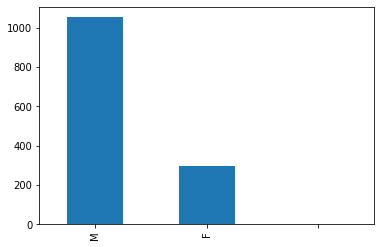

In [66]:
df.gender.value_counts().plot(kind='bar');

### Top sources

Out of the 4 sources, Twitter for iPhone is clearly the most widely used source to share tweets

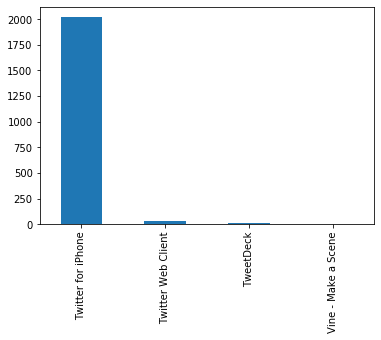

In [67]:
df.source.value_counts().plot(kind='bar');

### Most popular names given to dogs

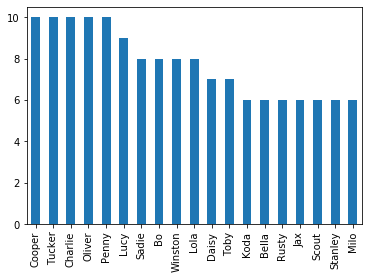

In [68]:
df.name.value_counts()[0:19].plot(kind='bar');

Penny, copper, charlie and oliver are the most popular names

Average Retweet and Favorite counts for dog breeds

Standard_poodle had the highest average retweet count while Saluki had the highest favorite count.

C:\Users\chinshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


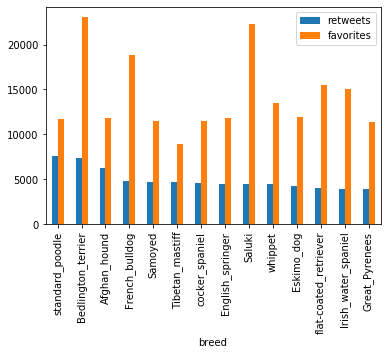

In [69]:
#group by breed and store the means of retweet_count and favorite_count.
df_group = df.groupby(['breed'])['retweets', 'favorites'].mean()
#order by retweet_count and favorite_count.
df_group = df_group.sort_values(['retweets', 'favorites'], ascending=False)
#plot the top 15 average counts.
df_group.iloc[0:14,].plot(kind='bar');
